In [75]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [76]:
df = pd.read_csv('titanicdata.csv',usecols=['Age','Fare','Survived'])

In [77]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [78]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [79]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [80]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [81]:
df.sample(5)

,Survived,Age,Fare
701,1,35.000000,26.2875
257,1,30.000000,86.5000
417,1,18.000000,13.0000
335,0,29.699118,7.8958
641,1,24.000000,69.3000


In [82]:
X = df.iloc[:,1:3]
y = df.iloc[:,0]

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

C:\Users\souvik\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


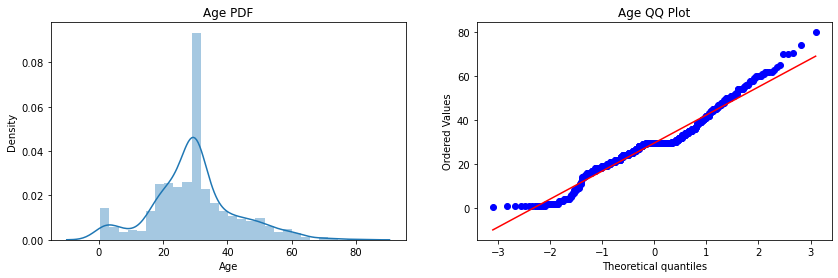

In [84]:
# Check which columns belongs to normally distributed using QQ Plot 
# Check for columns Age

plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

#### Here age columns already normally distributed

C:\Users\souvik\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


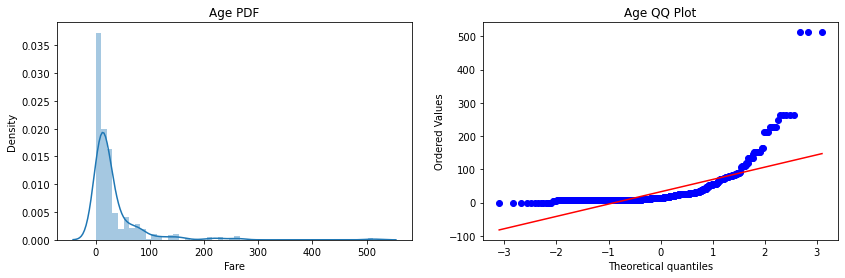

In [85]:
# Check columns Fare

plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

#### Here, Fare columns right skewed data , so here we can apply Log Transformation .

### Function Transformer apply on specific columns & Specific Transformation

In [86]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()
    

Accuracy 0.6712609238451936


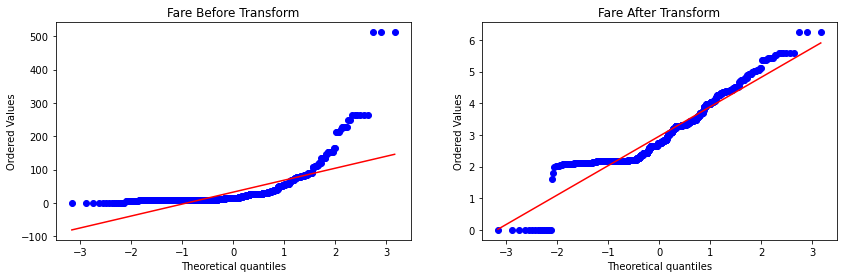

In [87]:
# Using Log Transformation

apply_transform(np.log1p)  

Accuracy 0.6442446941323345


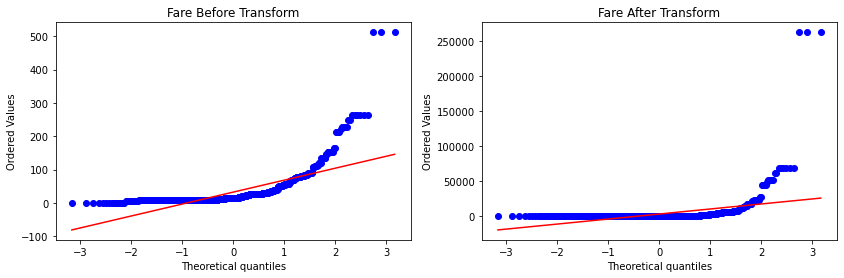

In [102]:
# Square Tranform

apply_transform(lambda x: x**2) 

Accuracy 0.61729088639201


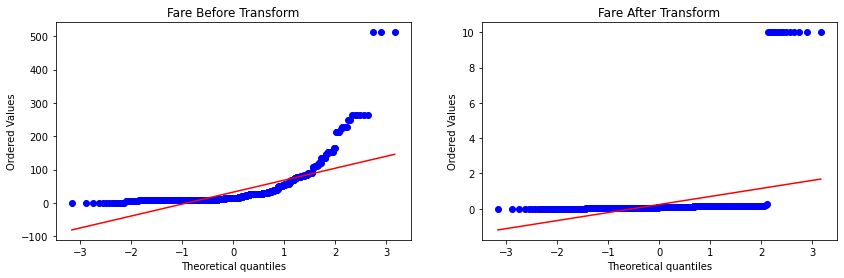

In [101]:
# Reciprocal Transform

apply_transform(lambda x: 1/(x+000000.1)) 

#### So , Here Log Transform is perform well 

### Now Showing , How to improve the accuracy value , after Transform the data 

In [88]:
# Before Transform the data

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)
    
y_pred = clf.predict(X_test)
y_pred1 = clf2.predict(X_test)
    
print("Accuracy Logistic Regression :",accuracy_score(y_test,y_pred))
print("Accuracy Decision Tree :",accuracy_score(y_test,y_pred1))

Accuracy Logistic Regression : 0.6480446927374302
Accuracy Decision Tree : 0.664804469273743


In [89]:
# Apply Log transformation on Fare Columns

trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

In [90]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed2,y_train)
clf2.fit(X_train_transformed2,y_train)
    
y_pred = clf.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)
    
print("Accuracy Logistic Regression :",accuracy_score(y_test,y_pred))
print("Accuracy Decision Tree :",accuracy_score(y_test,y_pred2))

Accuracy Logistic Regression : 0.6703910614525139
Accuracy Decision Tree : 0.6759776536312849


In [91]:
# Cross Validation Score

X_transformed2 = trf2.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed2,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed2,y,scoring='accuracy',cv=10)))

LR 0.6712609238451936
DT 0.6588389513108615


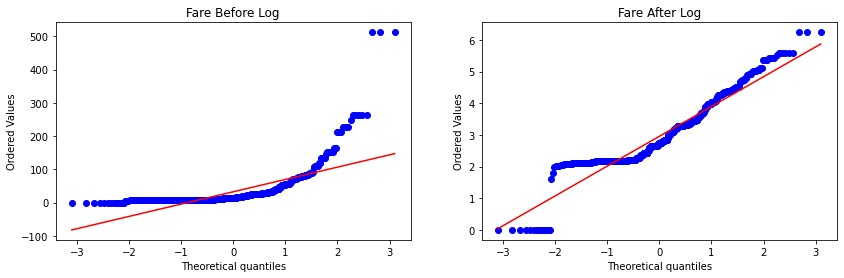

In [92]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist="norm", plot=plt)
plt.title('Fare After Log')

plt.show()